In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('titanic.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5,1,'Age Histogram')

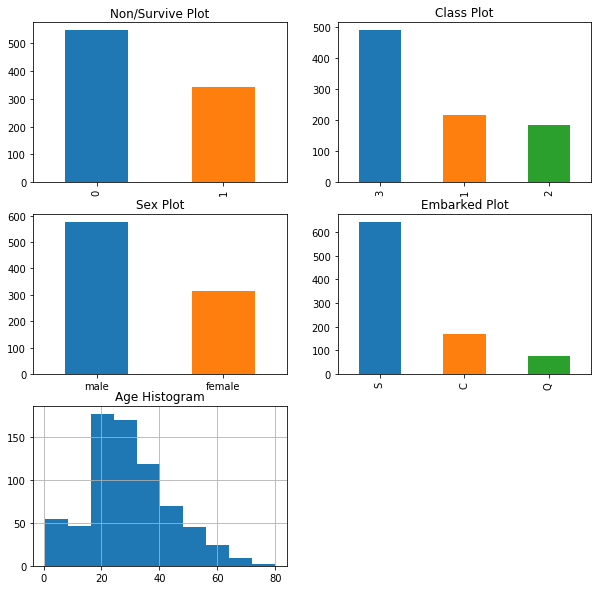

In [9]:
fig = plt.figure(figsize=(10,10))
fig_dims = (3,2)

#plot survive/non survice
plt.subplot2grid(fig_dims, (0,0))
df_train['Survived'].value_counts().plot(kind='bar', title = 'Non/Survive Plot')

#plot class
plt.subplot2grid(fig_dims, (0,1))
df_train['Pclass'].value_counts().plot(kind='bar', title = 'Class Plot')

#plot sex
plt.subplot2grid(fig_dims, (1,0))
df_train['Sex'].value_counts().plot(kind='bar', title = 'Sex Plot')

plt.xticks(rotation=0)

# Embarked Plot
plt.subplot2grid(fig_dims, (1,1))
df_train['Embarked'].value_counts().plot(kind='bar', title = 'Embarked Plot')

#age histogram
plt.subplot2grid(fig_dims, (2,0))
df_train['Age'].hist()
plt.title('Age Histogram')

In [12]:
# crosstab

pclass_xt = pd.crosstab(df_train['Survived'], df_train['Pclass'])

pclass_xt

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


Text(0,0.5,'Class')

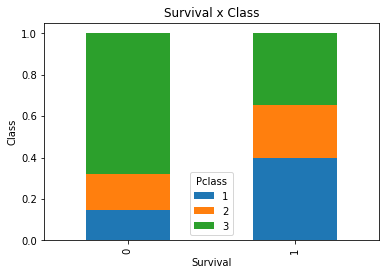

In [14]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar', stacked=True, title='Survival x Class')
plt.xlabel('Survival')
plt.ylabel('Class')